## IAT: detecting micro-clusters on suspicious behavors

A group of fraudsters always behave synchronously in a regular (fixed) pattern, which probably shows
suspiciousness comparing to the normally behaving people.
Therefore, we study the overall time intervals of users, and detect the suspicious micro-clusters that stands out of the majority distributions.
It can be used with vision-guided detection algorithm, EagleMine.


In [1]:
import spartan as st

Using backend cpu


Load data by function ```loadTensor```.<br/>

In [2]:
tensor_data = st.loadTensor(path = "./inputData/test.reid.gz", header=None, sep='\x01')
print(tensor_data.data)

                        0     1                 2    3         4
0     2020-01-11 16:58:12     0  4459592174140754    0     79984
1     2020-01-11 16:58:12     1  4459592174142932    1   6836725
2     2020-01-11 16:58:13     2  4459592177709460    1   6836725
3     2020-01-11 16:58:13     3  4459592177714275    2    104668
4     2020-01-11 16:58:13     4  4459592177715067    2    104668
...                   ...   ...               ...  ...       ...
9995  2020-01-11 18:01:00  9527  4459607973534612  502   9451393
9996  2020-01-11 18:00:59  9528  4459607973768695  509      6537
9997  2020-01-11 18:01:00  9529  4459607977732182    0     79984
9998  2020-01-11 18:01:01  9530  4459607981947099  380     79984
9999  2020-01-11 18:01:01  9531  4459607981954389  492  12837383

[10000 rows x 5 columns]


Use ```log_to_aggts``` function to extract time stamps in log files or edgelist tensor

In [3]:
aggts = tensor_data.log_to_aggts(time_col=0, group_col=[1], timeformat='%Y-%m-%d %H:%M:%S')

## IAT class

calaggiat function：calculate iat dict **aggiat** (key:user, value: iat list)

caliatcount function：calculate iat count dict **iatcount** (key:iat, value: frequency)

caliatpaircount function：calculate iat dict **iatpaircount** (key:(iat1, iat2), value: frequency)

get_user_iatpair_dict function：calculate iat dict **user_iatpair** (key:user, value: (iat1, iat2) list)

get_iatpair_user_dict function：calculate iat dict **iatpair_user** (key:(iat1, iat2), value: user list)

find_iatpair_user function: find users who have input iat pairs

In [4]:
instance = st.IAT()

In [5]:
# calculate aggiat dict
instance.calaggiat(aggts)

In [6]:
aggiat=instance.aggiat
aggiat

{37.0: array([696., 863.]),
 105.0: array([   4.,  423.,    5., 1155.,  899.,  257.]),
 178.0: array([970.]),
 184.0: array([169., 140.]),
 201.0: array([380., 138., 292.,  61.,  98.]),
 207.0: array([17.]),
 220.0: array([5., 8.]),
 232.0: array([1779.]),
 243.0: array([448.]),
 248.0: array([  24., 2350.]),
 299.0: array([47.]),
 304.0: array([1316.]),
 305.0: array([34.]),
 332.0: array([335.]),
 336.0: array([10.]),
 337.0: array([6.]),
 364.0: array([3548.]),
 390.0: array([372.]),
 398.0: array([2667.]),
 399.0: array([113.]),
 407.0: array([1532.]),
 419.0: array([13.,  4.]),
 424.0: array([  9.,  10.,  80., 735.]),
 449.0: array([2158.]),
 462.0: array([1255.]),
 467.0: array([403.]),
 469.0: array([1476.]),
 501.0: array([13.]),
 519.0: array([1123.,  628.]),
 524.0: array([23.]),
 530.0: array([  29., 1471.,   76.]),
 582.0: array([19.]),
 601.0: array([27., 28.]),
 619.0: array([  12., 2138.]),
 658.0: array([ 66.,  19.,  29., 129., 113.,  32., 182., 255., 549.,  20.,  65.,


In [7]:
instance.save_aggiat('./output/aggiat.dictlist.gz')

In [8]:
instance.load_aggiat('./output/aggiat.dictlist.gz')

In [9]:
xs, ys = instance.getiatpairs()
len(xs), len(ys)

(160, 160)

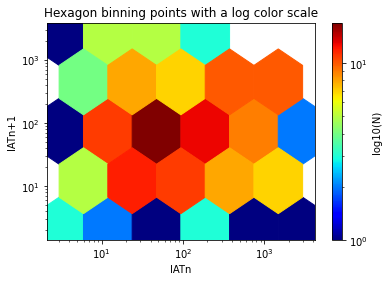

In [10]:
# invoke drawHexbin function
hexfig = st.drawHexbin(xs, ys, gridsize=5, xlabel='IATn', ylabel='IATn+1')

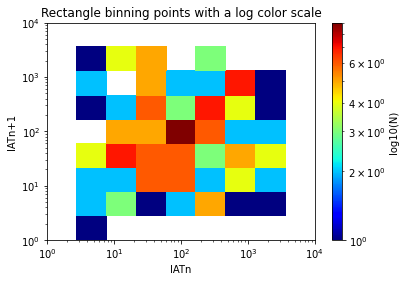

In [11]:
# invoke drawRectbin function
fig, hist = st.drawRectbin(xs, ys, gridsize=10, xlabel='IATn', ylabel='IATn+1')

## class RectHistogram
draw function: draw 2D histogram with rectangular bin

find_peak_rects function: find the bin with the largest number of samples in the range of
horizontal axis: [x-radius, x+radius]
vertical axis: [y-radius, y+radius]
    
return: (x,y) pairs in the bin that has the largest number of samples 

In [12]:
recthistogram = st.RectHistogram(xscale='log', yscale='log', gridsize=10)

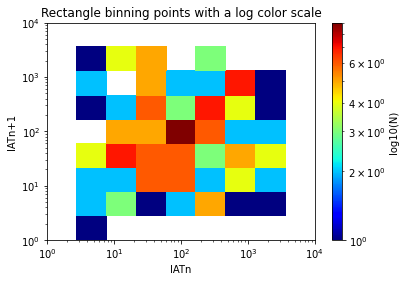

In [13]:
fig, H, xedges, yedges = recthistogram.draw(xs, ys, xlabel='IATn', ylabel='IATn+1')

In [14]:
recthistogram.find_peak_rect(xs, ys, H, xedges, yedges, x=100, y=100, radius=100)

[(61, 103),
 (61, 93),
 (61, 98),
 (154, 166),
 (166, 144),
 (75, 76),
 (64, 73),
 (78, 122),
 (129, 113)]